In [ ]:

from googleapiclient.discovery import build
from IPython.display import JSON

In [ ]:


api_key = "Kendi api key giriniz"

youtube = build('youtube', 'v3', developerKey=api_key)


In [ ]:
channel_ids = [
    'UCYO_jab_esuFRV4b17AJtAw',
]

In [52]:


channel_ids = ['UCYO_jab_esuFRV4b17AJtAw']

request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=','.join(channel_ids)
)
response = request.execute()




In [53]:
from googleapiclient.discovery import build

api_key = "Kendi api key giriniz"
youtube = build('youtube', 'v3', developerKey=api_key)


In [ ]:


channel_id = "UCYO_jab_esuFRV4b17AJtAw"

request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=channel_id
)
response = request.execute()



In [ ]:
channel_data = response['items'][0]
uploads_playlist_id = channel_data['contentDetails']['relatedPlaylists']['uploads']
print("Playlist ID:", uploads_playlist_id)



Playlist ID: UUYO_jab_esuFRV4b17AJtAw


In [ ]:
video_request = youtube.playlistItems().list(
    part='snippet',
    playlistId=uploads_playlist_id,
    maxResults=50
)
video_response = video_request.execute()


In [ ]:
import pandas as pd

videos = []

for item in video_response['items']:
    video_data = {
        'Video Başlığı': item['snippet']['title'],
        'Yayın Tarihi': item['snippet']['publishedAt'],
        'Video ID': item['snippet']['resourceId']['videoId']
    }
    videos.append(video_data)

video_df = pd.DataFrame(videos)
video_df.head()  # İlk 5 videoyu göster


,Video Başlığı,Yayın Tarihi,Video ID
0,"Summer of Math Exposition #4 | Teachers, I'd l...",2025-05-05T15:00:08Z,3foYyPDp0Ho
1,Where my explanation of Grover’s algorithm failed,2025-05-04T11:45:24Z,Dlsa9EBKDGI
2,But what is quantum computing? (Grover's Algo...,2025-04-30T12:32:19Z,RQWpF2Gb-gU
3,Testing your intuition for quantum computing,2025-04-30T12:32:13Z,XX8mjBXBqz8
4,How to measure nearby galaxies,2025-04-20T19:36:10Z,aQwEJKWATlE


In [ ]:
video_ids = video_df['Video ID'].tolist()

stats_request = youtube.videos().list(
    part="statistics",
    id=",".join(video_ids)
)
stats_response = stats_request.execute()


In [ ]:
stats = []

for item in stats_response['items']:
    stats.append({
        'Video ID': item['id'],
        'İzlenme Sayısı': item['statistics'].get('viewCount', 0),
        'Beğeni Sayısı': item['statistics'].get('likeCount', 0),
        'Yorum Sayısı': item['statistics'].get('commentCount', 0)
    })

stats_df = pd.DataFrame(stats)


In [ ]:
full_df = pd.merge(video_df, stats_df, on='Video ID')
full_df.head()


,Video Başlığı,Yayın Tarihi,Video ID,İzlenme Sayısı,Beğeni Sayısı,Yorum Sayısı
0,"Summer of Math Exposition #4 | Teachers, I'd l...",2025-05-05T15:00:08Z,3foYyPDp0Ho,35820,2908,189
1,Where my explanation of Grover’s algorithm failed,2025-05-04T11:45:24Z,Dlsa9EBKDGI,269126,15588,1462
2,But what is quantum computing? (Grover's Algo...,2025-04-30T12:32:19Z,RQWpF2Gb-gU,972440,47607,2512
3,Testing your intuition for quantum computing,2025-04-30T12:32:13Z,XX8mjBXBqz8,549995,14281,176
4,How to measure nearby galaxies,2025-04-20T19:36:10Z,aQwEJKWATlE,105507,2708,40


In [ ]:
video_ids = video_df['Video ID'].tolist()


In [ ]:
stats_request = youtube.videos().list(
    part="statistics",
    id=",".join(video_ids)
)
stats_response = stats_request.execute()


In [ ]:
stats = []

for item in stats_response['items']:
    stats.append({
        'Video ID': item['id'],
        'İzlenme Sayısı': int(item['statistics'].get('viewCount', 0)),
        'Beğeni Sayısı': int(item['statistics'].get('likeCount', 0)),
        'Yorum Sayısı': int(item['statistics'].get('commentCount', 0))
    })

stats_df = pd.DataFrame(stats)


In [ ]:
full_df = pd.merge(video_df, stats_df, on='Video ID')
full_df.head()


,Video Başlığı,Yayın Tarihi,Video ID,İzlenme Sayısı,Beğeni Sayısı,Yorum Sayısı
0,"Summer of Math Exposition #4 | Teachers, I'd l...",2025-05-05T15:00:08Z,3foYyPDp0Ho,36127,2917,189
1,Where my explanation of Grover’s algorithm failed,2025-05-04T11:45:24Z,Dlsa9EBKDGI,269321,15593,1463
2,But what is quantum computing? (Grover's Algo...,2025-04-30T12:32:19Z,RQWpF2Gb-gU,972822,47608,2512
3,Testing your intuition for quantum computing,2025-04-30T12:32:13Z,XX8mjBXBqz8,549995,14288,176
4,How to measure nearby galaxies,2025-04-20T19:36:10Z,aQwEJKWATlE,105507,2708,40


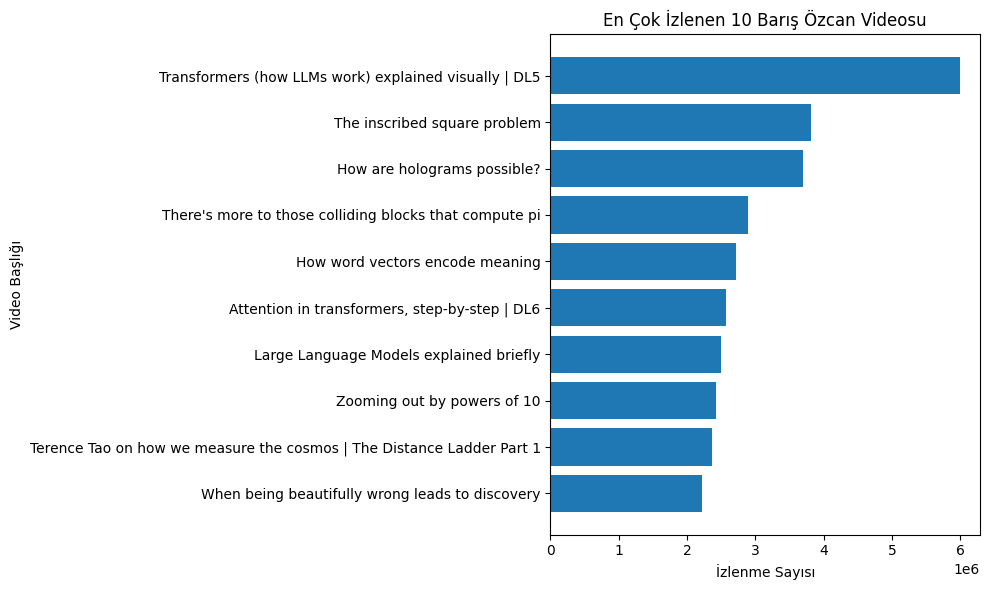

In [ ]:
import matplotlib.pyplot as plt

top_videos = full_df.sort_values(by='İzlenme Sayısı', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_videos['Video Başlığı'], top_videos['İzlenme Sayısı'])
plt.xlabel("İzlenme Sayısı")
plt.ylabel("Video Başlığı")
plt.title("En Çok İzlenen 10 Barış Özcan Videosu")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
